**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here
import numpy as np
from scipy import linalg
from scipy import optimize
from scipy.optimize import root
from scipy.optimize import minimize_scalar
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

I start by defining the parameters.

In [2]:
# Define parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
omega = 1.0
tau = 0.30

I now find the optimal labor supply choice.

First, I define the utility function and the objective function.

Second, I find the optimal labor supply choice. To do that I create a function, which uses the minimize_scalar(), where I use the objective function and sets the bounds to be $L\in[0,24]$. I use the method 'bounded'.

Third, I define which G values that should be considered.

Lastly, create a loop that finds the optimal labor supply for the two values of G and print the results.

In [3]:
# Utility function
def utility(L, omega, kappa, alpha, nu, tau, G):
    C = kappa + (1 - tau) * omega * L
    return np.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

# Objective function for optimization
def objective(L, omega, kappa, alpha, nu, tau, G):
    return -utility(L, omega, kappa, alpha, nu, tau, G)

# Optimize the objective function to find the optimal labor supply choice
def optimal_labor_supply(omega, kappa, alpha, nu, tau, G):
    res = minimize_scalar(objective, args=(omega, kappa, alpha, nu, tau, G), bounds=(0, 24), method='bounded')
    if res.success:
        return res.x
    else:
        return None

# Values of G to consider
G_values = [1.0, 2.0]

# Calculate optimal labor supply for each G value
for G in G_values:
    L_star = optimal_labor_supply(omega, kappa, alpha, nu, tau, G)
    if L_star is not None:
        print("For G = {:.1f}, the optimal labor supply choice is: L* = {:.2f}".format(G, L_star))
    else:
        print("For G = {:.1f}, there is no valid solution omegaithin the range.".format(G))

For G = 1.0, the optimal labor supply choice is: L* = 15.30
For G = 2.0, the optimal labor supply choice is: L* = 15.30


I find the optimal labor supply choice to be the same for the two values of G.

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

First, I create an array of 100 equally spaced values in the interval between 0.01 to 2.0. This denotes the different values of wages I consider.

Second, I make a loop such that I find the $L^*$ value for each value in w_values. I do this by using the function from the previous question. 

Finally, I plot the relationship between the wage and optimal labor supply.

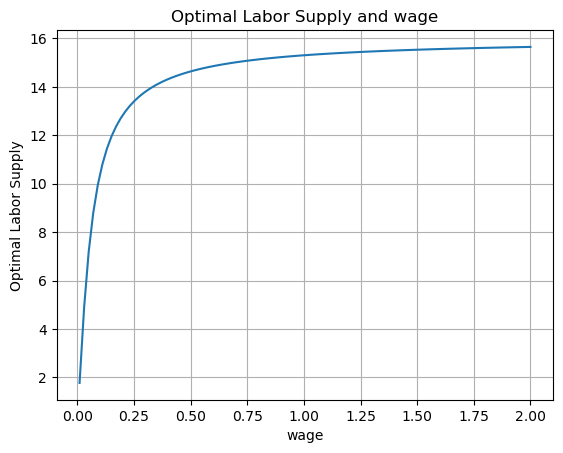

In [4]:
# Values of the wage to consider
w_values = np.linspace(0.01, 2.0, 100)

# Calculate optimal labor supply for each w value
L_values = []
for w in w_values:
    L_star = optimal_labor_supply(w, kappa, alpha, nu, tau, G)
    L_values.append(L_star)

# Plot the relationship between w and L
plt.plot(w_values, L_values)
plt.xlabel('wage')
plt.ylabel('Optimal Labor Supply')
plt.title('Optimal Labor Supply and wage')
plt.grid(True)
plt.show()

It can be seen on the figure that the optimal labor supply is increasing as the wage increases. But when the wage reaches a certain point, the increase in optimal labor supply is slowing down.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


I create an array of 100 equally spaced values for the tax rates in the interval between 0.0 to 1.0.

I then create empty arrays for storing the results.

The L, G, and worker utility can then be computed for each tax rate. I do that by creating a loop, which uses two of the earlier defined functions.

The results are finally plotted in a figure with three graphs. 

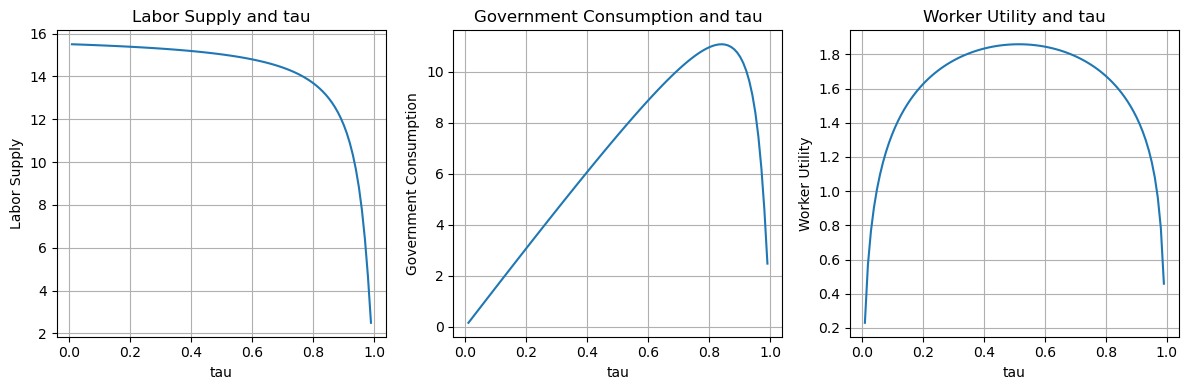

In [5]:
# Define a grid of tau values
tau_values = np.linspace(0.01, 0.99, 100)

# Initialize arrays for storing results
L_values = []
G_values = []
utility_values = []

# Calculate L, G, and utility for each tau value
for tau in tau_values:
    t_omega = (1 - tau) * omega
    L_star = optimal_labor_supply(omega, kappa, alpha, nu, tau, G)
    G = tau * omega * L_star
    utility_val = utility(L_star, omega, kappa, alpha, nu, tau, G)
    
    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility_val)

# Plot the results
plt.figure(figsize=(12, 4))

# Plot labor supply
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('tau')
plt.ylabel('Labor Supply')
plt.title('Labor Supply and tau')
plt.grid()

# Plot government consumption
plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values)
plt.xlabel('tau')
plt.ylabel('Government Consumption')
plt.title('Government Consumption and tau')
plt.grid()

# Plot worker utility
plt.subplot(1, 3, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('tau')
plt.ylabel('Worker Utility')
plt.title('Worker Utility and tau')
plt.grid()

plt.tight_layout()
plt.show()


I find that the labor supply is slowly decreasing as the taxes increases. From a tax rate at around 0.8 this process speeds up rapidly.

I see that the government consumption increases for increasing taxes up until a bit above 0.8 where it falls off. This is probably due to the labor supply falling - implying there is not much for the government to consume/spend.

It appears that the worker utility is increasing until the taxes reaches about 0.5, then it slowly decreases until it reaches a very high tax rate, where it decreases by more and more. 

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

I use my results from the previous question to answer this. I also plot the results in a figure, where I highlight the socially optimal tax rate and max utility.

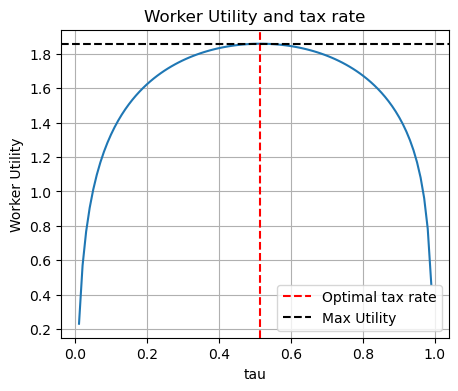

Max Utility: 1.86
Socially optimal tax rate: 0.51


In [6]:
# Calculate the max. utility and corresponding tau
max_utility_index = np.argmax(utility_values)
max_utility_tau = tau_values[max_utility_index]
max_utility = utility_values[max_utility_index]

# Plot the results
plt.figure(figsize=(5, 4))
plt.xlabel('tau')
plt.ylabel('Worker Utility')
plt.title('Worker Utility and tax rate')
plt.plot(tau_values, utility_values)
plt.axvline(x=max_utility_tau, color='r', linestyle='--', label='Optimal tax rate')
plt.axhline(y=max_utility, color='black', linestyle='--', label = 'Max Utility')
plt.legend()
plt.grid()
plt.show()

# Print the maximum utility and corresponding tau
print("Max Utility: {:.2f}".format(max_utility))
print("Socially optimal tax rate: {:.2f}".format(max_utility_tau))

The socially optimal tax rate that maximizes worker utility is 0.51.

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{\sigma-1} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

I first write up the parameters, and I use the found value of tau from question 4.

I then define the new utility function and objective function.

The objective function is then used to find the optimal labor supply choice.

The G that solves $G = \tau w L^{\star}((1-\tau)w,G)$ is then found by using fsolve. I also compute the utility.

This process is done for both Set 1 and Set 2.

In [7]:
# Set 1 parameters
sigma = 1.001
rho = 1.001
epsilon = 1.0
tau = max_utility_tau # approx 0.51, from q4

# Utility function
def utility2(L, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G):
    C = kappa + (1 - tau) * omega * L
    return (((alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (sigma-1)))**(1 - rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon) / (1 + epsilon))

# Objective function for optimization
def objective2(L, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G):
    return -utility2(L, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G)

# Optimize the objective function to find the optimal labor supply choice
def optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G):
    res = minimize_scalar(objective2, args=(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G), bounds=(0, 24), method='bounded')
    if res.success:
        return res.x
    else:
        return None

# Solve for G using the updated optimal_labor_supply2 function
G_solution_set1 = fsolve(lambda G: optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G) - G, x0=1.0)

# Calculate the corresponding utility for the optimal G
optimal_labor_set1 = optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G_solution_set1[0])
utility_set1 = utility2(optimal_labor_set1, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G_solution_set1[0])

print("Set 1:")
print("Optimal G: {:.2f}".format(G_solution_set1[0]))
print("Utility: {:.2f}".format(utility_set1))


Set 1:
Optimal G: 14.98
Utility: 2.19


I now repeat the process for Set 2.

In [8]:
# Set 2 parameters
sigma = 1.5
rho = 1.5
epsilon = 1.0
tau = max_utility_tau # approx 0.5152, from q4

# Solve for G using the updated optimal_labor_supply2 function
G_solution_set2 = fsolve(lambda G: optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G) - G, x0=1.0)

# Calculate the corresponding utility for the optimal G
optimal_labor_set2 = optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G_solution_set2[0])
utility_set2 = utility2(optimal_labor_set2, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G_solution_set2[0])

print("Set 2:")
print("Optimal G: {:.2f}".format(G_solution_set2[0]))
print("Utility: {:.2f}".format(utility_set2))



Set 2:
Optimal G: 8.54
Utility: 1.16


I find that the optimal G is 14.98 for Set 1 and 8.54 for Set 2. The higher values of sigma and rho in Set 2 compared to Set 2, leads to a lower optimal G and utility.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

I start by setting the parameters. Then I define a new objective function.

I can then create a function to solve for the socially optimal tax rate. I use minimize_scalar() with the "bounded" method, and I select the bounds to be between 0 and 1.

I then call the function to find the socially optimal tax rate. Furthermore, I note that for G I use the found value from the previous question.

The process is repeated for Set 2 and I print the results.

In [10]:
# Set 1 parameters
sigma = 1.001
rho = 1.001
epsilon = 1.0

# Objective function for optimization
def objective3(tau, omega, kappa, alpha, nu, sigma, rho, epsilon, G):
    L_star = optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G)
    return -utility2(L_star, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G)

# Function to solve for socially optimal tax rate
def find_optimal_tax_rate(omega, kappa, alpha, nu, sigma, rho, epsilon, G):
    res = minimize_scalar(objective3, args=(omega, kappa, alpha, nu, sigma, rho, epsilon, G), bounds=(0, 1), method='bounded')
    if res.success:
        return res.x
    else:
        return None

# Calculate the socially optimal tax rate
tau_optimal_set1 = find_optimal_tax_rate(omega, kappa, alpha, nu, sigma, rho, epsilon, G_solution_set1[0])

print("Set 1:")
print("Optimal Tau: {:.2f}".format(tau_optimal_set1))

# Set 2 parameters
sigma = 1.5
rho = 1.5
epsilon = 1.0

# Calculate the socially optimal tax rate
tau_optimal_set2 = find_optimal_tax_rate(omega, kappa, alpha, nu, sigma, rho, epsilon, G_solution_set2[0])

print("Set 2:")
print("Optimal Tau: {:.2f}".format(tau_optimal_set2))

Set 1:
Optimal Tau: 0.00
Set 2:
Optimal Tau: 0.00


The socially optimal tax rate, which maximizes worker utility is (very close to) 0 for both sets.

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

I first assign the parameter values and create the two kappa values of interest. I then create a loop where i for each of the two values of kappa, start by calculating  the optimal hairdresser quantity. Then I compute the corresponding  profit, and print the results. 

In [11]:
# set parameters
eta = 0.5
w = 1.0
kappa_values =[1.0, 2.0]

# Calculate the optimal hairdresser quantity for each kappa
for kappa in kappa_values:
    # Calculate the optimal hairdresser quantity
    hairdresser_q = ((1 - eta) * kappa / w) ** (1 / eta)

    # Calculate the corresponding profit
    pi = kappa * hairdresser_q ** (1 - eta) - w * hairdresser_q

    # Print the results
    print(f"For kappa = {kappa}:")
    print(f"Optimal hairdresser quantity: {hairdresser_q}")
    print(f"Profit: {pi}\n")


For kappa = 1.0:
Optimal hairdresser quantity: 0.25
Profit: 0.25

For kappa = 2.0:
Optimal hairdresser quantity: 1.0
Profit: 1.0



It appears when there occurs a positive demand shock, the profit and optimal hairdresser quantity increases. 

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K-1} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

First I set the seed, for making the results reproducible. Second, the parameters are defined. Third, I create several arrays for storing the results.

Fourth, I simulate the shocks and calculate the H. This is done by letting the outer loop iterating over the number of shocks, the inner loop iterates for the 120 planning horizon.

Lastly, I compute the mean of all the found H values and print the result.

In [12]:
# Set seed
np.random.seed(40)

# Parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
K = 8888  # Number of shocks

# Initialize variables
epsilon = np.zeros(120)
log_kappa = np.zeros(120)
log_kappa[0] = np.log(1.0)
hq = np.zeros(120)
h_values = np.zeros(K)

# Simulate shocks and compute h
for k in range(K):
    for t in range(120):
        epsilon[t] = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
        if t > 0:
            log_kappa[t] = rho * log_kappa[t-1] + epsilon[t]
        kappa = np.exp(log_kappa[t])
        hq[t] = ((1 - eta) * kappa / w) ** (1 / eta)
        
        if t > 0 and hq[t] != hq[t-1]:
            h_values[k] += R ** (-t) * (kappa * hq[t] ** (1 - eta) - w * hq[t] - iota)
        else:
            h_values[k] += R ** (-t) * (kappa * hq[t] ** (1 - eta) - w * hq[t])

# Calculate the expected value H
H = np.mean(h_values)

print(f"Approx. expected value of H: {H:.2f}")

Approx. expected value of H: 27.81


The approximately expected value of H is 27.81

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

I use the same approach from Question 2. However, this time I extend the model with the new policy.

In [13]:
# Set seed
np.random.seed(40)

# Parameters
delta = 0.05  # Threshold for policy change

# Initialize variables
epsilon = np.zeros(120)
log_kappa = np.zeros(120)
log_kappa[0] = np.log(1.0)
hq = np.zeros(120)
h_values = np.zeros(K)

# Hairdresser quantity - old policy
hq_prev = ((1 - eta) * np.exp(log_kappa[0]) / w) ** (1 / eta)

# Simulate shock series and calculate h for each series
for k in range(K):
    for t in range(120):
        epsilon[t] = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
        if t > 0:
            log_kappa[t] = rho * log_kappa[t-1] + epsilon[t]
        kappa = np.exp(log_kappa[t])
        hq[t] = ((1 - eta) * kappa / w) ** (1 / eta)
        
        if t > 0 and abs(hq_prev - hq[t]) > delta:
            h_values[k] += R ** (-t) * (kappa * hq[t] ** (1 - eta) - w * hq[t] - iota)
            hq_prev = hq[t]
        else:
            h_values[k] += R ** (-t) * (kappa * hq_prev ** (1 - eta) - w * hq_prev)

# The expected value H
H = np.mean(h_values)

print(f"Approx. expected value of H: {H:.2f}")

Approx. expected value of H: 28.48


I find that the implementation of the new policy does seem to improve the profitability by a tiny bit. The expected value of H increases from 27.81 to 28.48.

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

First, I define the range of delta values to try. Second, I initialize an array with the same length as delta_values, I use that for storing the computed H values.

Third, I create a loop, following a similar approach as the previous questions. Fourth, I find the optimal delta value. Finally, I plot the results and print the optimal values.

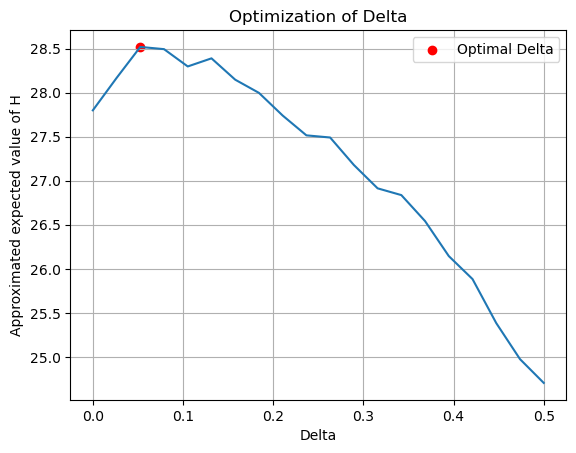

Optimal Delta: 0.05
Approx. expected value of H: 28.52


In [14]:
# Set seed
np.random.seed(40)

# Parameters
delta_values = np.linspace(0, 0.5, 20)

# Initialize variables
H_values = np.zeros(len(delta_values))

# Iterate over different delta values and calculate H
for i, delta in enumerate(delta_values):
    # Initialize variables
    epsilon = np.zeros(120)
    log_kappa = np.zeros(120)
    log_kappa[0] = np.log(1.0)
    h_values = np.zeros(K)
    
    # Hairdresser quantity with previous policy
    hq_prev = ((1 - eta) * np.exp(log_kappa[0]) / w) ** (1 / eta)
    
    # Simulate shock series and calculate h for each series
    for k in range(K):
        for t in range(120):
            epsilon[t] = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
            if t > 0:
                log_kappa[t] = rho * log_kappa[t-1] + epsilon[t]
            kappa = np.exp(log_kappa[t])
            hq = ((1 - eta) * kappa / w) ** (1 / eta)
            
            if t > 0 and abs(hq_prev - hq) > delta:
                h_values[k] += R ** (-t) * (kappa * hq ** (1 - eta) - w * hq - iota)
                hq_prev = hq
            else:
                h_values[k] += R ** (-t) * (kappa * hq_prev ** (1 - eta) - w * hq_prev)
    
    # Calculate the expected value H
    H_values[i] = np.mean(h_values)

# Find the optimal delta
optimal_delta = delta_values[np.argmax(H_values)]
optimal_H = np.max(H_values)

# Plot the results
plt.plot(delta_values, H_values)
plt.xlabel("Delta")
plt.ylabel("Approximated expected value of H")
plt.title("Optimization of Delta")
plt.grid(True)
plt.scatter(optimal_delta, optimal_H, color='red', label='Optimal Delta')
plt.legend()
plt.show()

print(f"Optimal Delta: {optimal_delta:.2f}")
print(f"Approx. expected value of H: {optimal_H:.2f}")

The optimal Delta is found to be 0.05, with an expected value of H at 28.52.


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [15]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

I now create a function, which aim to follow the instructions above.

In [16]:
def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    x_best = None
    f_best = np.inf
    iteration_count = 0

    for k in range(max_iterations):
        # 3.A: Draw random x^k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k < warmup_iterations:
            # 3.B: Go to step E
            x_k0 = x_k
        else:
            # 3.C: Calculate chi^k
            chi_k = 0.50 * 2 / (1 + np.exp((k - warmup_iterations) / 100))

            # 3.D: find x^k0
            x_k0 = chi_k * x_k + (1 - chi_k) * x_best

        # 3.E: Run optimizer with x^k0 as initial guess
        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)

        # 3.F: Update x_best if necessary
        if k == 0 or result.fun < f_best:
            x_best = result.x
            f_best = result.fun

        # 3.G: If true go to step 4
        if f_best < tolerance:
            break

        iteration_count += 1
        # Print iteration number and effective initial guess
        print(f"Iteration {iteration_count}: x_k0 = {x_k0}")
        
    # 4: return the result
    return x_best, iteration_count

# Step 1 and 2:
bounds = [-600, 600]
tolerance = 1e-8
warmup_iterations = 10
max_iterations = 1000

# Call the optimizer
best_x, total_iterations = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)
print("\nGlobal Minimum:")
print(f"Best x: {best_x}")
print(f"Best f(x): {griewank(best_x)}")
print(f"Total Iterations: {total_iterations}")

Iteration 1: x_k0 = [ 326.16595734 -487.19840129]
Iteration 2: x_k0 = [-40.22345724 518.0187052 ]
Iteration 3: x_k0 = [ 571.28816282 -508.91242822]
Iteration 4: x_k0 = [-518.11487964  399.33975027]
Iteration 5: x_k0 = [-318.18003818  186.61776602]
Iteration 6: x_k0 = [115.77223962 247.88469797]
Iteration 7: x_k0 = [298.97949769  19.8172972 ]
Iteration 8: x_k0 = [ -88.22735947 -256.7469367 ]
Iteration 9: x_k0 = [ 89.30737829 347.41563597]
Iteration 10: x_k0 = [-476.46255278  332.9161961 ]
Iteration 11: x_k0 = [-175.33377773   70.79633273]
Iteration 12: x_k0 = [ -95.75650191 -211.48146044]
Iteration 13: x_k0 = [-334.9750363    81.40519562]
Iteration 14: x_k0 = [-194.00109041  124.53328612]
Iteration 15: x_k0 = [-257.86424224  -72.33931615]
Iteration 16: x_k0 = [  96.23350348 -111.20315774]
Iteration 17: x_k0 = [104.00344992  71.29814973]
Iteration 18: x_k0 = [-84.59537702 100.06423266]
Iteration 19: x_k0 = [-267.33683051  243.39288592]
Iteration 20: x_k0 = [-174.46109263  171.04413755]
I

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

I now update the warmup_interations to the new value 100. I then call the optimizer from Question 1 and print the results.

In [18]:
# Settings
warmup_iterations = 100

# call optimizer
best_x, total_iterations = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)
print("\nGlobal Minimum:")
print(f"Best x: {best_x}")
print(f"Best f(x): {griewank(best_x)}")
print(f"Total Iterations: {total_iterations}")

Iteration 1: x_k0 = [559.19697725 248.17175879]
Iteration 2: x_k0 = [-305.20041193  121.29339757]
Iteration 3: x_k0 = [423.50085369 397.67896286]
Iteration 4: x_k0 = [174.98552034 467.61921574]
Iteration 5: x_k0 = [ 224.18890429 -554.75591737]
Iteration 6: x_k0 = [-398.42205296  106.21795956]
Iteration 7: x_k0 = [-452.04064309 -141.8822535 ]
Iteration 8: x_k0 = [391.35347702  46.56869369]
Iteration 9: x_k0 = [-434.71865314 -249.55089165]
Iteration 10: x_k0 = [378.91603899 204.80491575]
Iteration 11: x_k0 = [-287.49087236  299.04965462]
Iteration 12: x_k0 = [ 273.79127494 -214.30601167]
Iteration 13: x_k0 = [-288.35381588  -63.32007517]
Iteration 14: x_k0 = [217.53655918  45.31009999]
Iteration 15: x_k0 = [ 58.86159295 -53.47291896]
Iteration 16: x_k0 = [-551.52799625  -40.25960405]
Iteration 17: x_k0 = [-83.37540567 -33.15310832]
Iteration 18: x_k0 = [-12.77111958 199.62054277]
Iteration 19: x_k0 = [183.20749036 525.39189476]
Iteration 20: x_k0 = [-106.95406507 -153.93233933]
Iteration

The convergence pace does not seem to change much when increasing the number of warm up iterations. It still need many iterations before it converges, and it does not seem to find the global minima that often. It might even appear to be slightly slower.